In [1]:
from nonasymptotic.envs import GrayCodeWalls, NarrowPassage
from nonasymptotic.prm import SimpleRadiusPRM

import matplotlib.pyplot as plt
import numpy as np

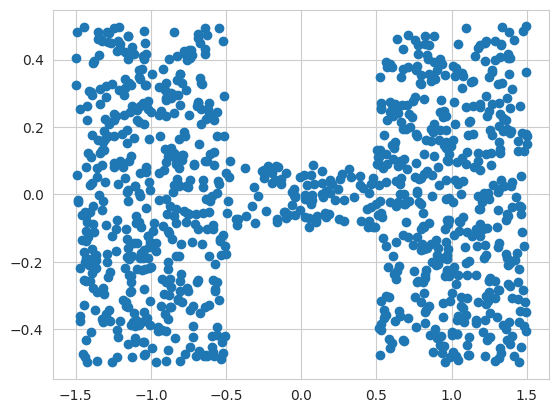

In [2]:
# visualizing 2D env
# env_2d = GrayCodeWalls(2, 2, 0.2)
env_2d = NarrowPassage(2, 0.1, seed=1999)
points = np.array([env_2d.sample_from_env() for _ in range(1000)])
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(points[:, 0], points[:, 1])
plt.show()


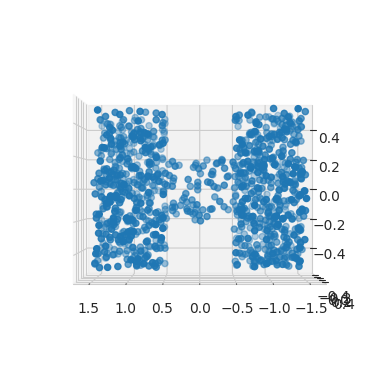

In [3]:
# visualizing 3D env
env_3d = NarrowPassage(3, 0.2, seed=1999)
points = np.array([env_3d.sample_from_env() for _ in range(1000)])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=00, azim=90)

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()


Generating control...
Initializing...
iteration: 1 recall: 0.970625 accuracy: 0.0497571 cost: 3.54354 M: 30 delta: 1 time: 0.0593845 one-recall: 0.94 one-ratio: 1.05917
iteration: 2 recall: 1 accuracy: 0 cost: 4.65021 M: 30 delta: 0.0274375 time: 0.143481 one-recall: 1 one-ratio: 1
Saving to text file; you won't be able to load text file.


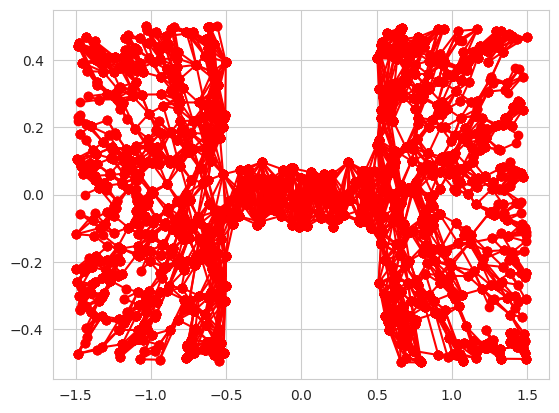

N nodes: 1000
N edges: 4900


In [14]:
# visualizing a small PRM built on 2d env
prm_env_2d = NarrowPassage(2, 0.1, seed=1999)
prm = SimpleRadiusPRM(0.05, env_2d.is_motion_valid, env_2d.sample_from_env, env_2d.sample_from_env, max_k_connection_neighbors=32, seed=1999)
prm.grow_to_n_samples(1000)

plt.figure()
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]
    
    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

plt.show()

# some other computations to help other visual tests later on:
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


N nodes: 1000
N edges: 4900


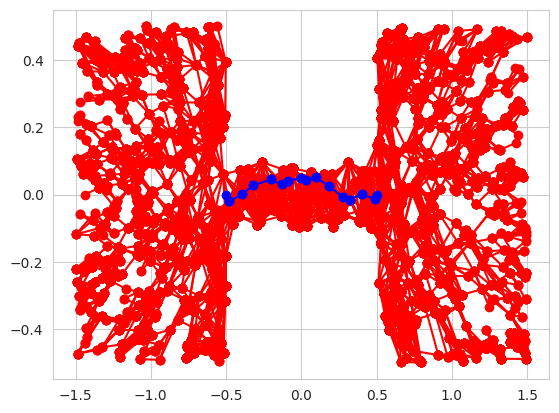

In [18]:
# do some connection queries with some existing points
s = np.array([-0.5, 0.0])
g = np.array([0.5, 0.0])

sol_dist, sol_path = prm.query_best_solution(s, g)
sol_path = np.concatenate([[s], sol_path, [g]])

plt.figure()

# plot the existing prm
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

for i in range(sol_path.shape[0] - 1):
    u = sol_path[i] 
    v = sol_path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')

plt.plot()
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())
